In [17]:
#LOGISTIC REGRESSION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
shroom = pd.read_csv('mushrooms.csv')
shroom[:3]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [19]:
shroom = shroom.drop(shroom[shroom['stalk-root']=='?'].index)
shroom = shroom.drop('veil-type', axis=1)

In [20]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
for feature in shroom.columns:
    if len(shroom[feature].unique()) == 2:
        shroom[feature] = lb.fit_transform(shroom[feature])

In [21]:
features_onehot = []
for feature in shroom.columns[1:]:
    if len(shroom[feature].unique()) > 2:
        features_onehot.append(feature)
temp = pd.get_dummies(shroom[features_onehot])
shroom = shroom.join(temp)
shroom = shroom.drop(features_onehot, axis=1)
shroom[:3]

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-color,cap-shape_b,cap-shape_c,cap-shape_f,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,1,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,1,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [22]:
from sklearn.model_selection import train_test_split

X = shroom.drop('class', axis=1).values
y = shroom['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (3950, 91)
X_test Shape: (1694, 91)
y_train Shape: (3950,)
y_test Shape: (1694,)


In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
accuracy = lr.score(X_test,y_test)
print(accuracy*100)

100.0


In [26]:
#RandomForestClassifier
mushroom = pd.read_csv('mushrooms.csv')
shroom2 = mushroom.drop(mushroom[mushroom['stalk-root']=='?'].index)

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [28]:
lbe = LabelEncoder()
for feature in shroom2.columns[1:]:
    shroom2[feature] = lbe.fit_transform(shroom2[feature])
shroom2[:3]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,2,...,2,5,5,0,0,1,3,1,3,5
1,e,5,2,7,1,0,1,0,0,2,...,2,5,5,0,0,1,3,2,2,1
2,e,0,2,6,1,3,1,0,0,3,...,2,5,5,0,0,1,3,2,2,3


In [29]:
y = shroom2['class'].values
X = shroom2.drop('class', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [30]:
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [32]:
accuracy = rfc.score(X_test,y_test)
print(accuracy*100)

100.0


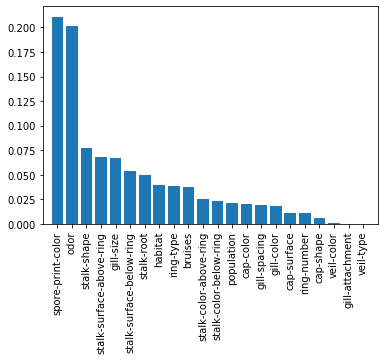

In [33]:
importances = rfc.feature_importances_
features = shroom2.columns[1:]
sort_indices = np.argsort(importances)[::-1]
sorted_features = []
for idx in sort_indices:
    sorted_features.append(features[idx])
plt.figure()
plt.bar(range(len(importances)), importances[sort_indices], align='center');
plt.xticks(range(len(importances)), sorted_features, rotation='vertical');
plt.xlim([-1, len(importances)])
plt.grid(False)

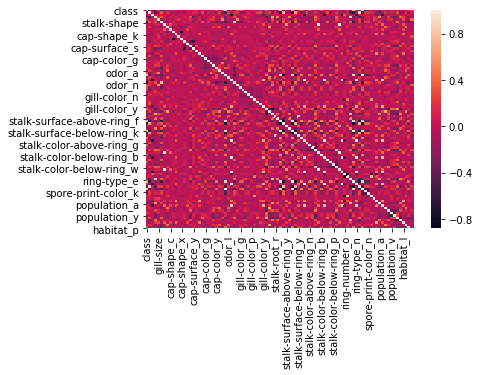

In [34]:
corr=shroom.corr()
sns.heatmap(corr, vmax=1., square=False)